In [1]:
#-*- coding: utf-8 -*-
import matplotlib
# matplotlib.use('TkAgg')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARIMA
# %matplotlib inline

C:\Users\yitgeng\AppData\Local\Programs\Python\Python35\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
# init params
datafile = 'Datasets/arima_data.csv'
forecastnum = 5

#读取数据，指定日期列为指标，Pandas自动将"DATE"列识别为Datetime格式
data = pd.read_csv(datafile, index_col='DATE')
# data[:5]

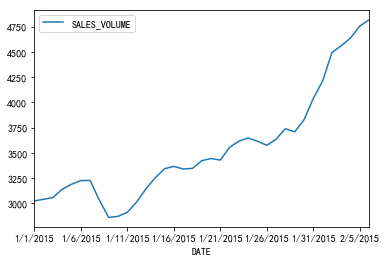

In [6]:
#时序图
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
data.plot()
plt.show()

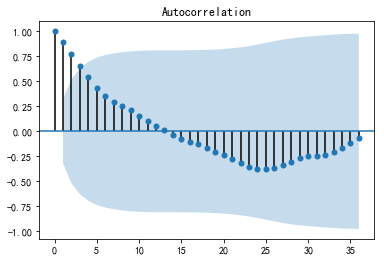

In [7]:
#自相关图
# plot_acf(data).show()
plot_acf(data)

In [8]:
#平稳性检测
salesVolumnADF= ADF(data['SALES_VOLUME'])
print(u'Raw time series ADF test result：\n', salesVolumnADF)
#返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

Raw time series ADF test result：
 (1.8137710150945268, 0.99837594215142644, 10, 26, {'1%': -3.7112123008648155, '5%': -2.9812468047337282, '10%': -2.6300945562130176}, 299.46989866024177)


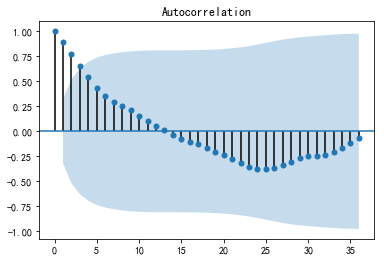

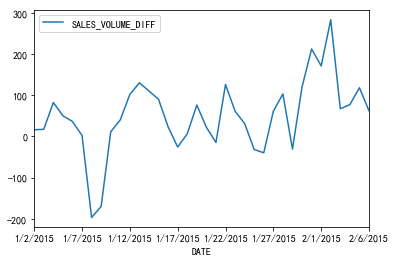

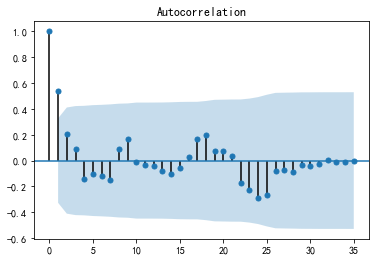

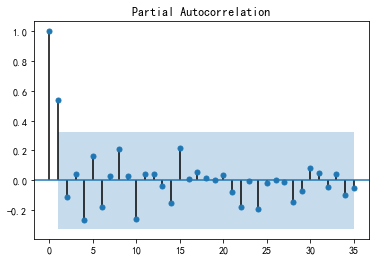

In [9]:
#差分后的结果
D_data = data.diff().dropna()
D_data.columns = [u'SALES_VOLUME_DIFF']
D_data.plot() #时序图
plot_acf(D_data) #自相关图
plot_pacf(D_data) #偏自相关图
plt.show()

In [10]:
salesVolumnDiffADF= ADF(D_data['SALES_VOLUME_DIFF'])
print(u'1-diff time series ADF test result：', salesVolumnDiffADF) #平稳性检测

1-diff time series ADF test result： (-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.59090907803341)


In [11]:
print("Sales Volumn ADF", salesVolumnADF)
print("Sales Volumn Diff ADF", salesVolumnDiffADF)
# 返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

Sales Volumn ADF (1.8137710150945268, 0.99837594215142644, 10, 26, {'1%': -3.7112123008648155, '5%': -2.9812468047337282, '10%': -2.6300945562130176}, 299.46989866024177)
Sales Volumn Diff ADF (-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.59090907803341)


In [12]:
# 差分序列的白噪声检验
print(u'1-diff series white noise test result: ', acorr_ljungbox(D_data, lags=1)) #返回统计量和p值

1-diff series white noise test result:  (array([ 11.30402222]), array([ 0.00077339]))


In [13]:
data[u'SALES_VOLUME'] = data[u'SALES_VOLUME'].astype(float)
#定阶
pmax = int(len(D_data)/10) #一般阶数不超过length/10
qmax = int(len(D_data)/10) #一般阶数不超过length/10
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
    try: #存在部分报错，所以用try来跳过报错。
      tmp.append(ARIMA(data, (p,1,q)).fit().bic)
    except:
      tmp.append(None)
  bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值

p,q = bic_matrix.stack().idxmin() #先用stack展平，然后用idxmin找出最小值位置。
print(u'BIC minimal p-value and q-value is：%s、%s' %(p,q)) 
model = ARIMA(data, (p,1,q)).fit() #建立ARIMA(0, 1, 1)模型

C:\Users\yitgeng\AppData\Local\Programs\Python\Python35\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\yitgeng\AppData\Local\Programs\Python\Python35\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\yitgeng\AppData\Local\Programs\Python\Python35\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


C:\Users\yitgeng\AppData\Local\Programs\Python\Python35\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\yitgeng\AppData\Local\Programs\Python\Python35\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
C:\Users\yitgeng\AppData\Local\Programs\Python\Python35\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:654: RuntimeWarning: invalid value encountered in log
  R_mat, T_mat)
C:\Users\yitgeng\AppData\Local\Programs\Python\Python35\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:654: RuntimeWarning: invalid value encountered in true_divide
  R_mat, T_mat)
C:\Users\yitgeng\AppData\Local\Programs\Python\Python35\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
C:\Users\yitgeng\AppData\Local\

C:\Users\yitgeng\AppData\Local\Programs\Python\Python35\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


BIC minimal p-value and q-value is：0、1
                           Results: ARIMA
Model:              ARIMA            BIC:                 422.5101  
Dependent Variable: D.SALES_VOLUME   Log-Likelihood:      -205.88   
Date:               2017-12-07 13:35 Scale:               1.0000    
No. Observations:   36               Method:              css-mle   
Df Model:           2                Sample:              01-02-2015
Df Residuals:       34                                    02-06-2015
Converged:          1.0000           S.D. of innovations: 73.086    
AIC:                417.7595         HQIC:                419.418   
--------------------------------------------------------------------
                       Coef.  Std.Err.   t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                 49.9564  20.1390 2.4806 0.0182 10.4847 89.4281
ma.L1.D.SALES_VOLUME   0.6710   0.1648 4.0712 0.0003  0.3480  0.9941
----------------------

(array([ 4873.9667493 ,  4923.92317644,  4973.87960359,  5023.83603073,
         5073.79245787]),
 array([  73.08574293,  142.32679918,  187.542821  ,  223.80281869,
         254.95704265]),
 array([[ 4730.72132537,  5017.21217324],
        [ 4644.96777602,  5202.87857687],
        [ 4606.30242887,  5341.4567783 ],
        [ 4585.19056646,  5462.48149499],
        [ 4574.08583666,  5573.49907907]]))

In [15]:
#给出一份模型报告
print(model.summary2())

                           Results: ARIMA
Model:              ARIMA            BIC:                 422.5101  
Dependent Variable: D.SALES_VOLUME   Log-Likelihood:      -205.88   
Date:               2017-12-07 13:41 Scale:               1.0000    
No. Observations:   36               Method:              css-mle   
Df Model:           2                Sample:              01-02-2015
Df Residuals:       34                                    02-06-2015
Converged:          1.0000           S.D. of innovations: 73.086    
AIC:                417.7595         HQIC:                419.418   
--------------------------------------------------------------------
                       Coef.  Std.Err.   t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                 49.9564  20.1390 2.4806 0.0182 10.4847 89.4281
ma.L1.D.SALES_VOLUME   0.6710   0.1648 4.0712 0.0003  0.3480  0.9941
-------------------------------------------------------------

In [14]:
model.forecast(5) #作为期5天的预测，返回预测结果、标准误差、置信区间。

(array([ 4873.9667493 ,  4923.92317644,  4973.87960359,  5023.83603073,
         5073.79245787]),
 array([  73.08574293,  142.32679918,  187.542821  ,  223.80281869,
         254.95704265]),
 array([[ 4730.72132537,  5017.21217324],
        [ 4644.96777602,  5202.87857687],
        [ 4606.30242887,  5341.4567783 ],
        [ 4585.19056646,  5462.48149499],
        [ 4574.08583666,  5573.49907907]]))